In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import lambertw
from mpl_toolkits import mplot3d
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

cond non cut-off zone : (N-1)/2 * log(1/v) = 3.020304743969161 vs. Gamma_prime_N(B)/(beta*N) = 3.3333333333333335
[]
0
0
equivalent mean non-neutral delta = 0.035673993347252395


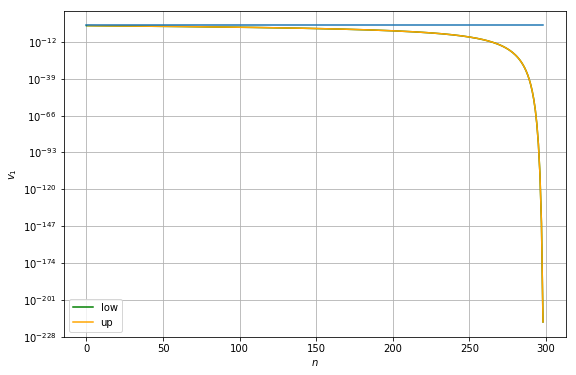

In [2]:
# some givens
slack_budget_div_beta = 1000
N = 300
C0 = 1
v = 0.98

n = np.arange(N)
n_bis = np.arange(1,N)
k = np.arange(N)

C_1 = C0 * v**((N-1-n)/2)*np.exp(-slack_budget_div_beta/(N-n))
v_1 = C_1*(C0*v**(N-1-k))**(-1)
v_1_bis = C_1[1:]*(C0*v**(N-n_bis))**(-1)
val = np.ceil(N-(1+np.sqrt(1-(8*slack_budget_div_beta)/np.log(v)))/2)
val_threshold = int(np.max((0,np.min((N,val)))))
indices_1 = n[v_1>0]
ok_indices_1 = k[(v_1<=1) & (v_1>0)]
indices_1_bis = n_bis[v_1_bis>0]
ok_indices_1_bis = n_bis[(v_1_bis>1)]


print('cond non cut-off zone : (N-1)/2 * log(1/v) = '+str((N-1)/2*np.log(1/v))+' vs. Gamma_prime_N(B)/(beta*N) = '+\
      str(slack_budget_div_beta/N))
print(np.intersect1d(ok_indices_1,ok_indices_1_bis))
print(ok_indices_1[0])
print(val_threshold)
print('equivalent mean non-neutral delta = '+str(np.exp(-slack_budget_div_beta/(N-ok_indices_1[0]))))
plt.figure(figsize=(9,6))
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$v_1$')
plt.semilogy(indices_1,v_1[v_1>0],color='green')
plt.semilogy(indices_1_bis,v_1_bis[v_1_bis>0],color='orange')
plt.semilogy(indices_1,np.ones(len(indices_1)))
plt.legend(['low','up']);

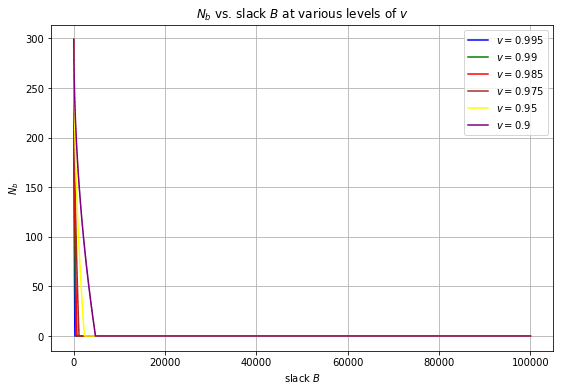

In [3]:
N = 300
C0 = 1
vector2 = np.logspace(-5,5,10000)

plt.figure(figsize=(9,6))

plt.grid()
plt.title('$N_b$ vs. slack $B$ at various levels of $v$')

v = 0.995

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='blue');

v = 0.99

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='green');

v = 0.985

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='red');

v = 0.975
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='brown');

v = 0.95
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='yellow');

v = 0.9
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='purple');

plt.legend(['$v = 0.995$','$v = 0.99$','$v = 0.985$','$v =0.975$','$v =0.95$','$v =0.9$'])
plt.xlabel('slack $B$')
plt.ylabel('$N_b$');
plt.savefig('Nb12.pdf')

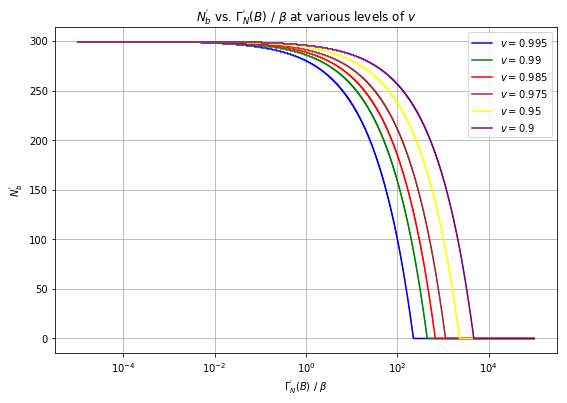

In [4]:
N = 300
C0 = 1
vector2 = np.logspace(-5,5,10000)

plt.figure(figsize=(9,6))

plt.grid()
plt.title('$N_b^{\'}$ vs. $\Gamma^{\'}_N(B)$ / '+r'$\beta$'+' at various levels of $v$')

v = 0.995

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='blue');

v = 0.99

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='green');

v = 0.985

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='red');

v = 0.975
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='brown');

v = 0.95
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='yellow');

v = 0.9
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='purple');

plt.legend(['$v = 0.995$','$v = 0.99$','$v = 0.985$','$v =0.975$','$v =0.95$','$v =0.9$'])
plt.xlabel('$\Gamma^{\'}_N(B)$ / '+r'$\beta$')
plt.ylabel('$N_b^{\'}$');
plt.savefig('Nb12_log.pdf')

In [5]:
N = 300
v_vec = np.linspace(0.8,0.995,50)
slack_budget_div_beta_vec = np.logspace(-5,5,1000)

slack_budget_grid,v_grid = np.meshgrid(slack_budget_div_beta_vec,v_vec)

Nb_grid = np.zeros(v_grid.shape)

for elem_v in np.arange(len(v_vec)):
    for elem_slack_budget in np.arange(len(slack_budget_div_beta_vec)):
        slack_budget_prop,v_prop = slack_budget_grid[elem_v][elem_slack_budget],v_grid[elem_v][elem_slack_budget]
        Nb_proposal = np.ceil(N-(1+np.sqrt(1-(8*slack_budget_prop)/np.log(v_prop)))/2)
        Nb_grid[elem_v][elem_slack_budget] = np.max((0,np.min((N,Nb_proposal))))

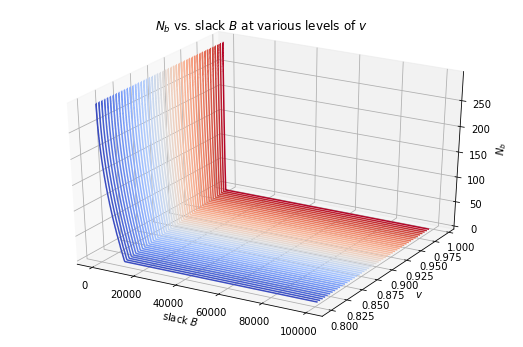

In [6]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.contour(slack_budget_grid,v_grid,Nb_grid, 50,zdir='y',cmap=cm.coolwarm)
ax.set_title('$N_b$ vs. slack $B$ at various levels of $v$');
ax.set_ylabel('$v$')
ax.set_xlabel('slack $B$')
ax.set_zlabel('$N_b$');

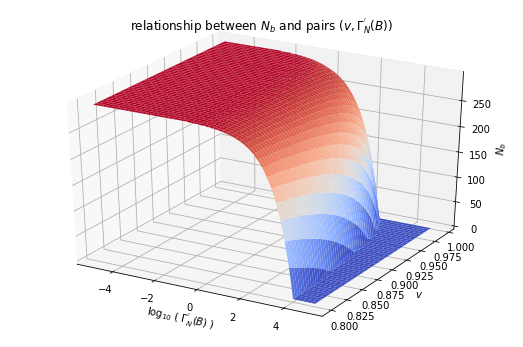

In [7]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_surface(np.log10(slack_budget_grid),v_grid,Nb_grid,cmap=cm.coolwarm)
ax.set_title('relationship between $N_b$ and pairs ($v,\Gamma_N^{\'}(B)$)');
ax.set_ylabel('$v$')
ax.set_xlabel('$\log_{10}$ ( $\Gamma_N^{\'}(B)$ )')
ax.set_zlabel('$N_b$');
plt.savefig('3DNb12_log.pdf')

best FGD: 0.0058819394071274195
best GD: 0.003719987858088537


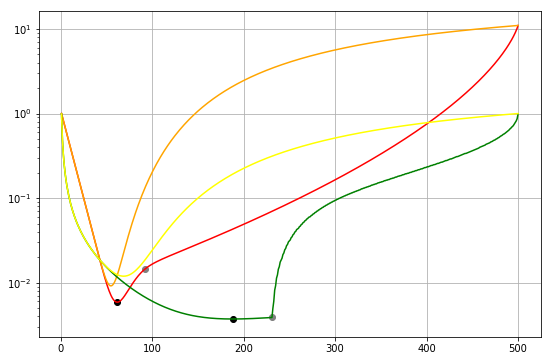

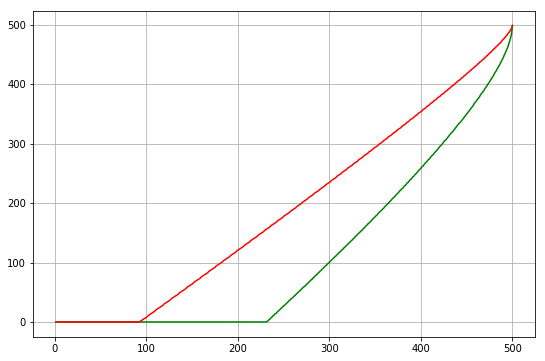

In [8]:
kappa = 0.01
K_div_beta = 1
N_max = 500
multi = 1

plt.figure(figsize=(9,6))

plt.grid()

vector_N = np.arange(N_max)+1

v = 1/(1+np.sqrt(kappa))
C0 = lambda N: 1
gamma = lambda N: 1
div = lambda N: (1+np.sqrt(kappa))**(N-1)

vals = np.array([np.ceil(N_elem-(1+np.sqrt(1-(8*(K_div_beta*(N_max-N_elem)))/np.log(v)))/2) for N_elem in vector_N])
vals_threshold = np.array([np.max((0,np.min((N_max,Nb_elem)))) for Nb_elem in vals])

epsilon_list = []
Nb_prime_list_FGD = []
epsilon_list_constant = []
bar_delta_list = []
cond = True
value_pre_switch = np.inf
N_pre_switch = 0

for index_N in np.arange(len(vector_N)):
    
    N = vector_N[index_N]
    Nb_prime = int(vals_threshold[index_N])
    Nb_prime_list_FGD.append(Nb_prime)
    k = np.arange(int(N))
    k_prime = np.arange(Nb_prime,int(N))
    C = C0(N)*v**((N-1-Nb_prime)/2)*np.exp(-K_div_beta*(N_max-N)/(N-Nb_prime))
    delta_sched = np.concatenate((np.ones(Nb_prime),C*v**(-(N-1-k_prime))),axis=0)
    conv_term = gamma(N)*multi/div(N)
    value = conv_term + np.sum(C0(N)*v**(N-1-k)*delta_sched)
    epsilon_list.append(value)
    bar_delta = np.exp(-K_div_beta*(N_max-N)/(N))
    bar_delta_list.append(bar_delta)
    if Nb_prime>0 and cond:
        N_pre_switch = N-1
        cond = False
        value_pre_switch = epsilon_list[-2]
    epsilon_list_constant.append(conv_term + np.sum(C0(N)*v**(N-1-k)*bar_delta))
    
N_best = vector_N[np.argmin(np.array(epsilon_list))]
plt.semilogy(vector_N,np.array(epsilon_list),color='red')
plt.semilogy(vector_N,np.array(epsilon_list_constant),color='orange');
plt.scatter([N_best],[np.min(np.array(epsilon_list))],color='black')
plt.scatter([N_pre_switch],[value_pre_switch],color='gray');
best_FGD = np.min(np.array(epsilon_list))
print('best FGD: '+str(best_FGD))

v = (1-kappa)
C0 = lambda N: kappa/(1-(1-kappa)**N)
gamma = lambda N: (1-kappa)**N
div = lambda N: (1-(1-kappa)**N)/kappa

vals = np.array([np.ceil(N_elem-(1+np.sqrt(1-(8*(K_div_beta*(N_max-N_elem)))/np.log(v)))/2) for N_elem in vector_N])
vals_threshold = np.array([np.max((0,np.min((N_max,Nb_elem)))) for Nb_elem in vals])

epsilon_list = []
Nb_prime_list_GD = []
epsilon_list_constant = []
bar_delta_list = []
cond = True
value_pre_switch = np.inf
N_pre_switch = 0

for index_N in np.arange(len(vector_N)):
    
    N = vector_N[index_N]
    Nb_prime = int(vals_threshold[index_N])
    Nb_prime_list_GD.append(Nb_prime)
    k = np.arange(int(N))
    k_prime = np.arange(Nb_prime,int(N))
    C = C0(N)*v**((N-1-Nb_prime)/2)*np.exp(-K_div_beta*(N_max-N)/(N-Nb_prime))
    delta_sched = np.concatenate((np.ones(Nb_prime),C*v**(-(N-1-k_prime))),axis=0)
    conv_term = gamma(N)*multi/div(N)
    value = conv_term + np.sum(C0(N)*v**(N-1-k)*delta_sched)
    epsilon_list.append(value)
    bar_delta = np.exp(-K_div_beta*(N_max-N)/(N))
    bar_delta_list.append(bar_delta)
    if Nb_prime>0 and cond:
        N_pre_switch = N-1
        cond = False
        value_pre_switch = epsilon_list[-2]
    epsilon_list_constant.append(conv_term + np.sum(C0(N)*v**(N-1-k)*bar_delta))
    
N_best = vector_N[np.argmin(np.array(epsilon_list))]
plt.semilogy(vector_N,np.array(epsilon_list),color='green')
plt.semilogy(vector_N,np.array(epsilon_list_constant),color='yellow');
plt.scatter([N_best],[np.min(np.array(epsilon_list))],color='black')
plt.scatter([N_pre_switch],[value_pre_switch],color='gray');
best_GD = np.min(np.array(epsilon_list))
print('best GD: '+str(best_GD))


plt.figure(figsize=(9,6))
plt.grid()
plt.plot(vector_N,Nb_prime_list_GD,color='green')
plt.plot(vector_N,Nb_prime_list_FGD,color='red');

#plt.legend(['$v = 0.995$','$v = 0.99$','$v = 0.985$','$v =0.975$','$v =0.95$','$v =0.9$'])
#plt.xlabel('$\Gamma^{\'}_N(B)$ / '+r'$\beta$')
#plt.ylabel('$N_b^{\'}$');
#plt.savefig('eps_try.pdf')

best FGD: 0.00018979503227621993 at 101
best FGD constant: 0.000565822806043306
FGD constant at best: 0.0017174441327240826
 
q-measure: 0.00037602777376708607
relative q-measure: 66.45680763498711 %
relative unfair q-measure: 88.94898362864467 %
 
best GD: 0.0048345250733184695 at 126
best GD constant: 0.0048916433664183915
GD constant at best: 0.0049047503753587695
 
q-measure: 5.7118293099922036e-05
relative q-measure: 1.167670838230861 %
relative unfair q-measure: 1.4317813683874414 %
 


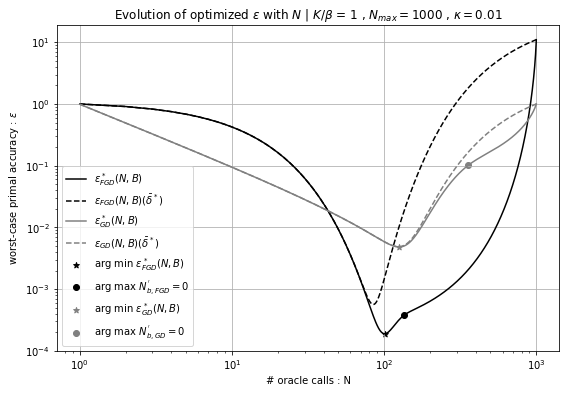

In [78]:
kappa = 0.01
K_div_beta = 1
N_max = 1000
multi = 1

plt.figure(figsize=(9,6))

plt.grid()

vector_N = np.arange(N_max)+1

v = 1/(1+np.sqrt(kappa))
C0 = lambda N: 1
gamma = lambda N: 1
div = lambda N: (1+np.sqrt(kappa))**(N-1)

vals = [(np.ceil(N_elem-(1+np.sqrt(1-(8*(K_div_beta*(N_max-N_elem)))/np.log(v)))/2) , N_elem ) for N_elem in vector_N]
vals_threshold = np.array([np.max((0,np.min((Nb_elem[1],Nb_elem[0])))) for Nb_elem in vals])

epsilon_list = []
Nb_prime_list_FGD = []
epsilon_list_constant = []
bar_delta_list = []
cond = True
value_pre_switch = np.inf
N_pre_switch = 0

for index_N in np.arange(len(vector_N)):
    
    N = vector_N[index_N]
    Nb_prime = int(vals_threshold[index_N])
    Nb_prime_list_FGD.append(Nb_prime)
    k = np.arange(int(N))
    k_prime = np.arange(Nb_prime,int(N))
    C = C0(N)*v**((N-1-Nb_prime)/2)*np.exp(-K_div_beta*(N_max-N)/(N-Nb_prime))
    delta_sched = np.concatenate((np.ones(Nb_prime),C/C0(N)*v**(-(N-1-k_prime))),axis=0)
    conv_term = gamma(N)*multi/div(N)
    value = conv_term + np.sum(C0(N)*v**(N-1-k)*delta_sched)
    epsilon_list.append(value)
    bar_delta = np.exp(-K_div_beta*(N_max-N)/(N))
    bar_delta_list.append(bar_delta)
    if Nb_prime>0 and cond:
        N_pre_switch = N-1
        cond = False
        value_pre_switch = epsilon_list[-2]
    epsilon_list_constant.append(conv_term + np.sum(C0(N)*v**(N-1-k)*bar_delta))
    
N_best = vector_N[np.argmin(np.array(epsilon_list))]
plt.loglog(vector_N,np.array(epsilon_list),color='black')
plt.loglog(vector_N,np.array(epsilon_list_constant),color='black',linestyle='--');
plt.scatter([N_best],[np.min(np.array(epsilon_list))],color='black',marker='*')
plt.scatter([N_pre_switch],[value_pre_switch],color='black',marker='o');
#plt.loglog(vector_N, vector_N*v**((vector_N-1)/2)*np.exp(-K_div_beta*(N_max-vector_N)/vector_N))
best_FGD = np.min(np.array(epsilon_list))
best_FGD_constant = np.min(epsilon_list_constant)
FGD_constant_at_best = epsilon_list_constant[N_best]
print('best FGD: '+str(best_FGD)+' at '+str(N_best))
print('best FGD constant: '+str(best_FGD_constant))
print('FGD constant at best: '+str(FGD_constant_at_best))
print(' ')
print('q-measure: '+str(best_FGD_constant-best_FGD))
print('relative q-measure: '+str(100*(1-best_FGD/best_FGD_constant))+' %')
print('relative unfair q-measure: '+str(100*(1-best_FGD/FGD_constant_at_best))+' %')
print(' ')

v = (1-kappa)
C0 = lambda N: kappa/(1-(1-kappa)**N)
gamma = lambda N: (1-kappa)**N
div = lambda N: (1-(1-kappa)**N)/kappa

vals = [(np.ceil(N_elem-(1+np.sqrt(1-(8*(K_div_beta*(N_max-N_elem)))/np.log(v)))/2) , N_elem ) for N_elem in vector_N]
vals_threshold = np.array([np.max((0,np.min((Nb_elem[1],Nb_elem[0])))) for Nb_elem in vals])

epsilon_list = []
Nb_prime_list_GD = []
epsilon_list_constant = []
bar_delta_list = []
cond = True
value_pre_switch = np.inf
N_pre_switch = 0

for index_N in np.arange(len(vector_N)):
    
    N = vector_N[index_N]
    Nb_prime = int(vals_threshold[index_N])
    Nb_prime_list_GD.append(Nb_prime)
    k = np.arange(int(N))
    k_prime = np.arange(Nb_prime,int(N))
    C = C0(N)*v**((N-1-Nb_prime)/2)*np.exp(-K_div_beta*(N_max-N)/(N-Nb_prime))
    delta_sched = np.concatenate((np.ones(Nb_prime),C/C0(N)*v**(-(N-1-k_prime))),axis=0)
    conv_term = gamma(N)*multi/div(N)
    value = conv_term + np.sum(C0(N)*v**(N-1-k)*delta_sched)
    epsilon_list.append(value)
    bar_delta = np.exp(-K_div_beta*(N_max-N)/(N))
    bar_delta_list.append(bar_delta)
    if Nb_prime>0 and cond:
        N_pre_switch = N-1
        cond = False
        value_pre_switch = epsilon_list[-2]
    epsilon_list_constant.append(conv_term + np.sum(C0(N)*v**(N-1-k)*bar_delta))
    
N_best = vector_N[np.argmin(np.array(epsilon_list))]
plt.loglog(vector_N,np.array(epsilon_list),color='gray')
plt.loglog(vector_N,np.array(epsilon_list_constant),color='gray',linestyle='--');
plt.scatter([N_best],[np.min(np.array(epsilon_list))],color='gray',marker='*')
plt.scatter([N_pre_switch],[value_pre_switch],color='gray',marker='o');
best_GD = np.min(np.array(epsilon_list))
best_GD_constant = np.min(epsilon_list_constant)
GD_constant_at_best = epsilon_list_constant[N_best]
print('best GD: '+str(best_GD)+' at '+str(N_best))
print('best GD constant: '+str(best_GD_constant))
print('GD constant at best: '+str(GD_constant_at_best))
print(' ')
print('q-measure: '+str(best_GD_constant-best_GD))
print('relative q-measure: '+str(100*(1-best_GD/best_GD_constant))+' %')
print('relative unfair q-measure: '+str(100*(1-best_GD/GD_constant_at_best))+' %')
print(' ')

plt.title('Evolution of optimized $\epsilon$ with $N$ | $K / $'+r'$\beta$ = '+str(K_div_beta)+' , $N_{max} = $'+str(N_max)+' , $\kappa = $'+str(kappa))
plt.xlabel('# oracle calls : N')
plt.ylabel('worst-case primal accuracy : $\epsilon$')
plt.legend(['$\epsilon_{FGD}^*(N,B)$','$\epsilon_{FGD}(N,B)'+r'(\bar{\delta}^*)$','$\epsilon_{GD}^*(N,B)$','$\epsilon_{GD}(N,B)'+r'(\bar{\delta}^*)$',\
            'arg min $\epsilon^*_{FGD}(N,B)$','arg max $N_{b,FGD}^{\'}=0$',\
           'arg min $\epsilon^*_{GD}(N,B)$','arg max $N_{b,GD}^{\'}=0$']);
plt.savefig('results22_'+'KdivBeta'+str(K_div_beta)+'Nmax'+str(N_max)+'kappa'+str(kappa)+'.pdf')